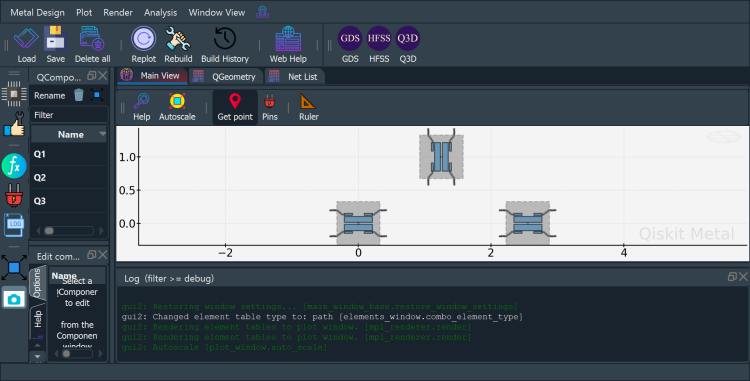

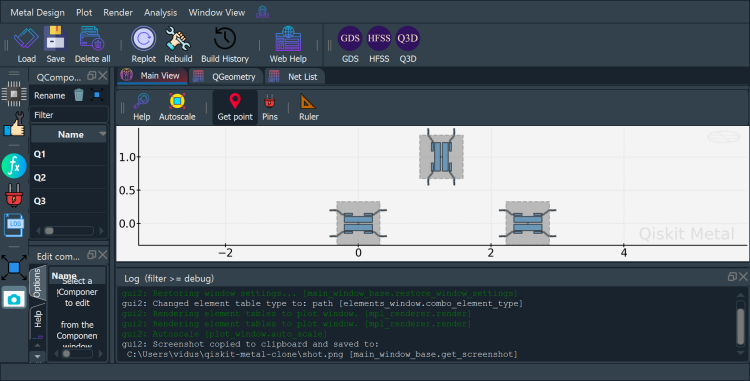

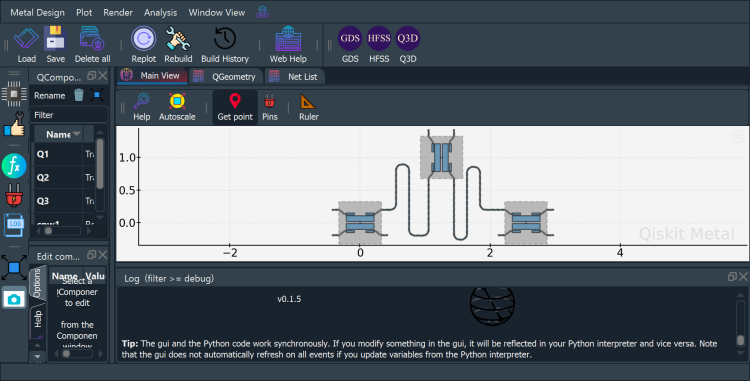

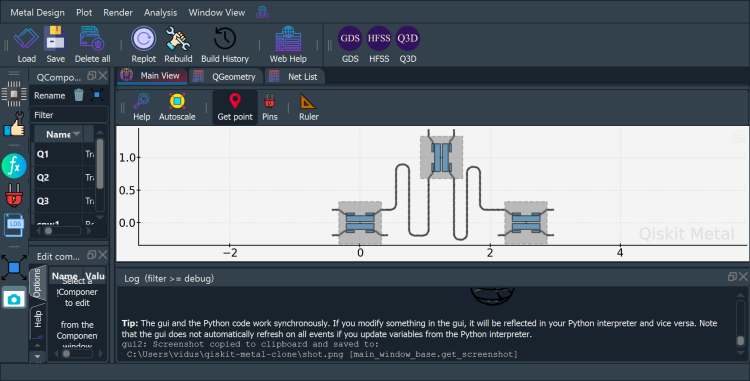

04:28PM 13s WARNING [check_lengths]: For path table, component=cpw2, key=trace has short segments that could cause issues with fillet. Values in (4-5)  are index(es) in shapely geometry.
04:28PM 13s WARNING [check_lengths]: For path table, component=cpw2, key=cut has short segments that could cause issues with fillet. Values in (4-5)  are index(es) in shapely geometry.
04:29PM 05s WARNING [check_lengths]: For path table, component=cpw2, key=trace has short segments that could cause issues with fillet. Values in (4-5)  are index(es) in shapely geometry.
04:29PM 05s WARNING [check_lengths]: For path table, component=cpw2, key=cut has short segments that could cause issues with fillet. Values in (4-5)  are index(es) in shapely geometry.


In [10]:
        #STEP 1- Importing qiskit metal and all the required directories 
import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, open_docs

        #STEP 2: Launching Qiskit metal and enabling overwrite command
design = designs.DesignPlanar()
design.overwrite_enabled = True
gui = MetalGUI(design)

        #STEP 3: Importing 3 transmons and inserting pins in all the transmons 

from qiskit_metal.qlibrary.qubits.transmon_pocket import TransmonPocket

options = dict(
    
    pad_width = '425 um', 
    pocket_height = '650um',# To change certain parameters from the default settings
    # Adding 4 connectors(pins for connecting) (see below for defaults)
    connection_pads=dict( 
        a = dict(loc_W=+1,loc_H=+1), 
        b = dict(loc_W=-1,loc_H=+1),
        c = dict(loc_W=+1,loc_H=-1),
        d = dict(loc_W=-1,loc_H=-1),
    )
)


#Inserting transmons and using the function options to insert pins with respect to the transmon location
q2 = TransmonPocket(design, 'Q1', options = dict(
    pos_x='+2.55mm', pos_y='+0.0mm', **options))
q1 = TransmonPocket(design, 'Q2', options = dict(
    pos_x='+0.0mm', pos_y='-0.0mm', **options))
q3 = TransmonPocket(design, 'Q3', options = dict(
    pos_x='+1.25mm', pos_y='+1.0mm',orientation = '90', **options))


        #STEP 4 - Rebuilding the circuit to see the changes. Taking screenshots to see the changes
gui.rebuild()
gui.autoscale()
gui.screenshot()
#gui.highlight_components(['Q1','Q2','Q3'])
gui.screenshot()

        #STEP 5-Defining a function to connect two pins together  using coplanar wave guide[CPW]
from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
RouteMeander.get_template_options(design)

options = Dict(
    meander=Dict(
        lead_start='0.1mm',
        lead_end='0.1mm',
        asymmetry='0 um')
)


def connect(component_name: str, component1: str, pin1: str, component2: str, pin2: str,
            length: str,
            asymmetry='0 um', flip=False):
    """Connect two pins with a CPW."""
    myoptions = Dict(
        pin_inputs=Dict(
            start_pin=Dict(
                component=component1,
                pin=pin1),
            end_pin=Dict(
                component=component2,
                pin=pin2)),
        lead=Dict(
            start_straight='0.13mm'
        ),
        total_length=length,
    fillet = '90um')
    myoptions.update(options)
    myoptions.meander.asymmetry = asymmetry
    myoptions.meander.lead_direction_inverted = 'true' if flip else 'false'
    return RouteMeander(design, component_name, myoptions)


        #STEP 6 - Using the function [connect] to connect the transmon together
asym = 150
cpw1 = connect('cpw1', 'Q2', 'a', 'Q3', 'b', '3.0 mm', f'+{asym}um')
cpw2 = connect('cpw2', 'Q3', 'd', 'Q1', 'b', '3.1 mm', f'-{asym}um', flip=True)
#cpw3 = connect('cpw3', 'Q1', 'd', 'Q2', 'c', '6.0 mm', f'+{asym}um')

        #STEP 7 - Rebuilding the circuit to see the new changes(CPW)

gui.rebuild()
gui.autoscale()
gui.screenshot()
#gui.highlight_components(['Q1','Q2','Q3','cpw1','cpw2'])
gui.screenshot()